In [6]:
import neuralnet as nn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
np.random.seed(123)

In [7]:
# Load training data
TRAIN_IN, TRAIN_OUT = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
N = 20
a = 0.0001

In [8]:
AdamArgs = (0.9, 0.999)

In [9]:
model = nn.Sequence([nn.AutoEncoder(784, 50, *AdamArgs)])

Training of coupled autoencoder complete in 0.6324540734291076 seconds per epoch.


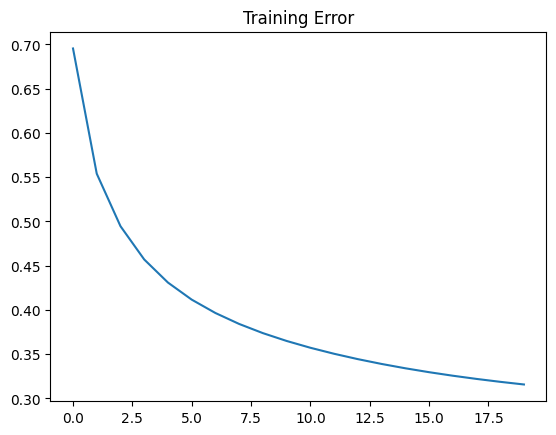

In [10]:
ts = time.time()
errors = nn.train(model, TRAIN_IN, TRAIN_IN, N, a)
# errors = nn.fixed_encoder(TRAIN_IN, N, a)
duration = time.time() - ts
print(f"Training of coupled autoencoder complete in {duration / N} seconds per epoch.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()